# Model 1: Linear Regression and Random Forest

A predictive model using a Machine Learning algorithm to accurately predict the sales revenue for a given item in a specific store at a given date.

In [1]:
# Import panda library

import pandas as pd

In [2]:
# Read the csv files

sales_train = pd.read_csv('sales_train.csv')
items_weekly_sell_prices = pd.read_csv('items_weekly_sell_prices.csv')
calendar = pd.read_csv('calendar.csv')
calendar_event = pd.read_csv('calendar_events.csv')

# EDA (Exploratory Data Analysis)

In [76]:
print(sales_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1547 entries, id to d_1541
dtypes: int64(1541), object(6)
memory usage: 359.9+ MB
None


In [77]:
print(sales_train.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1532  d_1533  d_1534  d_1535  d_1536  \
0       CA    0    0    0    0  ...       1       1       1       0       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       0       0       1       0       0   
3       CA    0    0    0    0  ...       8       2       0       8       2   
4       CA    0    0    0    0  ...       2       0       1       3       2   

   d_1537  d_1538  d_1539  d_1540  d_1541  


In [78]:
print(sales_train.describe())

                d_1           d_2           d_3           d_4           d_5  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       1.070220      1.041292      0.780026      0.833454      0.627944   
std        5.126689      5.365468      3.667454      4.415141      3.379344   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      360.000000    436.000000    207.000000    323.000000    296.000000   

                d_6           d_7           d_8           d_9          d_10  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       0.958052      0.918662      1.244080      1.073663      0.838701   
std        4.785947      5.059495      6.617729    

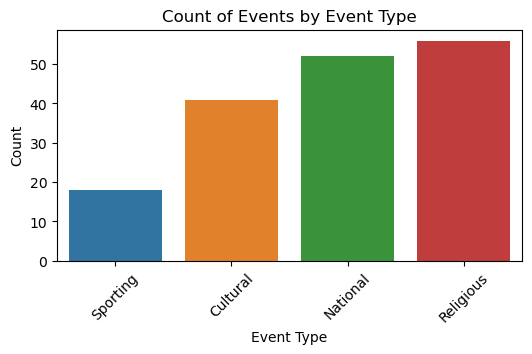

In [81]:
plt.figure(figsize=(6, 3))
sns.countplot(data=calendar_event, x='event_type')
plt.title('Count of Events by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

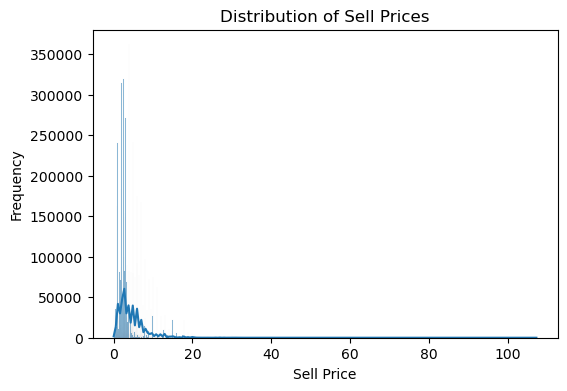

In [96]:
plt.figure(figsize=(6, 4))
sns.histplot(items_weekly_sell_prices['sell_price'], kde=True)
plt.title('Distribution of Sell Prices')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.show()

# Data Merge in Chunk Sizes

In [3]:
# Review the sales train data

sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3


In [4]:
# Check unique values of store

sales_train['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [5]:
# Check unique values of item

sales_train['item_id'].unique()

array(['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', ...,
       'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827'], dtype=object)

* Merge code in a chunk Sizes

In [6]:
# Assign a chunk size

chunk_size = 100

In [7]:
# Create a blank dataframe to save merged data

merged_data = pd.DataFrame()

In [8]:
# Create a loop to merge data in chunks

for chunk_start in range(0, len(sales_train), chunk_size):
    chunk_end = chunk_start + chunk_size
    chunk_sales = sales_train.iloc[chunk_start:chunk_end]

In [9]:
# Chunk 1 where train_sales and items_weekly_sell_prices are merged

chunk_merged = pd.merge(chunk_sales, items_weekly_sell_prices, on=['item_id', 'store_id'])

In [10]:
# Review chunk 1 data

chunk_merged

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541,wm_yr_wk,sell_price
0,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,1,0,0,1,0,0,0,11401,3.48
1,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,1,0,0,1,0,0,0,11402,3.48
2,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,1,0,0,1,0,0,0,11403,3.48
3,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,1,0,0,1,0,0,0,11404,3.48
4,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,1,0,0,1,0,0,0,11405,3.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20429,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,4,3,0,3,0,4,0,3,11617,1.00
20430,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,4,3,0,3,0,4,0,3,11618,1.00
20431,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,4,3,0,3,0,4,0,3,11619,1.00
20432,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,4,3,0,3,0,4,0,3,11620,1.00


In [11]:
# Check memory size of the merged_chunk

chunk_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20434 entries, 0 to 20433
Columns: 1549 entries, id to sell_price
dtypes: float64(1), int64(1542), object(6)
memory usage: 241.6+ MB


In [12]:
# Change data type of train data
# As the memory size is large, it is difficult to merge further, so the datatype is changed from int 64 to int 16

int64_columns = chunk_merged.select_dtypes(include=['int64']).columns
chunk_merged[int64_columns] = chunk_merged[int64_columns].astype('int16')

In [13]:
# After the data type has been reduced, review the memory size

chunk_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20434 entries, 0 to 20433
Columns: 1549 entries, id to sell_price
dtypes: float64(1), int16(1542), object(6)
memory usage: 61.3+ MB


In [14]:
# In chunk2 calendar data will be merged

calendar = pd.read_csv('calendar.csv')

In [15]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1969 non-null   object
 1   wm_yr_wk  1969 non-null   int64 
 2   d         1969 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.3+ KB


In [16]:
# Change data type of train data

int64_columns = calendar.select_dtypes(include=['int64']).columns
calendar[int64_columns] = calendar[int64_columns].astype('int16')

In [17]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1969 non-null   object
 1   wm_yr_wk  1969 non-null   int16 
 2   d         1969 non-null   object
dtypes: int16(1), object(2)
memory usage: 34.7+ KB


In [18]:
# In chunk2 data merged with calender on 'wn_yr_wk' column

chunk_merged = pd.merge(chunk_merged, calendar, on=['wm_yr_wk'])

In [19]:
chunk_merged

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541,wm_yr_wk,sell_price,date,d
0,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,0,11401,3.48,2014-02-01,d_1100
1,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,0,11401,3.48,2014-02-02,d_1101
2,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,0,11401,3.48,2014-02-03,d_1102
3,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,0,11401,3.48,2014-02-04,d_1103
4,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,0,11401,3.48,2014-02-05,d_1104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142583,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,11353,1.28,2014-01-27,d_1095
142584,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,11353,1.28,2014-01-28,d_1096
142585,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,11353,1.28,2014-01-29,d_1097
142586,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,11353,1.28,2014-01-30,d_1098


In [20]:
#In chunk3 data mered with the calender event on date column

chunk_merged = pd.merge(chunk_merged, calendar_event, on=['date'], how='left')

In [21]:
chunk_merged

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1538,d_1539,d_1540,d_1541,wm_yr_wk,sell_price,date,d,event_name,event_type
0,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-01,d_1100,NaN,NaN
1,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-02,d_1101,SuperBowl,Sporting
2,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-03,d_1102,NaN,NaN
3,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-04,d_1103,NaN,NaN
4,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-05,d_1104,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142959,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,11353,1.28,2014-01-27,d_1095,NaN,NaN
142960,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,11353,1.28,2014-01-28,d_1096,NaN,NaN
142961,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,11353,1.28,2014-01-29,d_1097,NaN,NaN
142962,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,11353,1.28,2014-01-30,d_1098,NaN,NaN


In [22]:
# This is a final merged_data using all the csv files in the dataframe

merged_data = pd.concat([merged_data, chunk_merged], ignore_index=True)

In [23]:
merged_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1538,d_1539,d_1540,d_1541,wm_yr_wk,sell_price,date,d,event_name,event_type
0,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-01,d_1100,NaN,NaN
1,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-02,d_1101,SuperBowl,Sporting
2,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-03,d_1102,NaN,NaN
3,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-04,d_1103,NaN,NaN
4,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-05,d_1104,NaN,NaN


In [24]:
# 'd' column is edited and converted float to int datatype

merged_data['d'] = merged_data['d'].str.replace('d_', '').astype(int)

In [25]:
merged_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1538,d_1539,d_1540,d_1541,wm_yr_wk,sell_price,date,d,event_name,event_type
0,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-01,1100,NaN,NaN
1,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-02,1101,SuperBowl,Sporting
2,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-03,1102,NaN,NaN
3,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-04,1103,NaN,NaN
4,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,0,0,11401,3.48,2014-02-05,1104,NaN,NaN


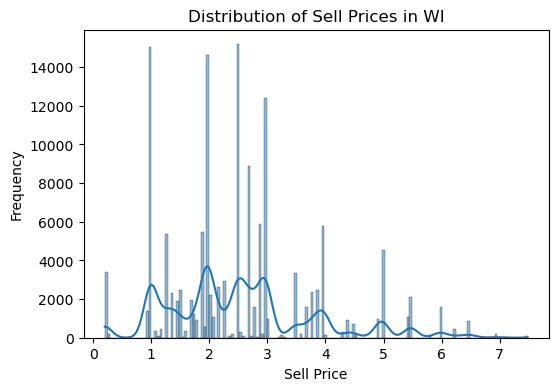

In [89]:
plt.figure(figsize=(6, 4))
sns.histplot(wi_data['sell_price'], kde=True)
plt.title('Distribution of Sell Prices in WI')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.show()

In [26]:
merged_data.shape

(142964, 1553)

In [27]:
merged_data['store_id'].unique()

array(['WI_3'], dtype=object)

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
print(merged_data.describe())

            wm_yr_wk     sell_price              d          sales  \
count  142964.000000  142964.000000  142964.000000  142964.000000   
mean    11380.290535       2.531950    1107.168609    7608.580129   
std       149.187786       1.270496     544.482002    9164.257134   
min     11101.000000       0.200000       1.000000       0.000000   
25%     11244.000000       1.740000     672.000000    1727.500000   
50%     11409.000000       2.480000    1162.000000    4109.000000   
75%     11516.000000       2.980000    1573.000000    9375.560000   
max     11621.000000       7.480000    1969.000000   46619.120000   

       total_revenue  
count  142964.000000  
mean    53260.003180  
std     51762.739943  
min         0.000000  
25%     17044.200000  
50%     35877.480000  
75%     72143.320000  
max    326333.840000  


In [74]:
print(merged_data.dtypes)

id                object
item_id           object
dept_id           object
cat_id            object
store_id          object
state_id          object
wm_yr_wk           int16
sell_price       float64
date              object
d                  int32
event_name        object
event_type        object
sales            float64
total_revenue    float64
dtype: object


# Data Preprocessing

In [28]:
# Missing data treatment on missing values in merged_data

merged_data.isna().sum()

id                 0
item_id            0
dept_id            0
cat_id             0
store_id           0
               ...  
sell_price         0
date               0
d                  0
event_name    130841
event_type    130841
Length: 1553, dtype: int64

In [29]:
# Handling missing values of categorical column event_name and event_type

merged_data['event_name'].fillna(merged_data['event_name'].mode()[0], inplace=True)
merged_data['event_type'].fillna(merged_data['event_type'].mode()[0], inplace=True)

In [30]:
# Review data after treating missing values

merged_data.isna().sum()

id            0
item_id       0
dept_id       0
cat_id        0
store_id      0
             ..
sell_price    0
date          0
d             0
event_name    0
event_type    0
Length: 1553, dtype: int64

In [31]:
# Split data into cat and con

cat = []
con = []
for i in merged_data.columns:
    if(merged_data[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [32]:
# Review con data
con

['d_1',
 'd_2',
 'd_3',
 'd_4',
 'd_5',
 'd_6',
 'd_7',
 'd_8',
 'd_9',
 'd_10',
 'd_11',
 'd_12',
 'd_13',
 'd_14',
 'd_15',
 'd_16',
 'd_17',
 'd_18',
 'd_19',
 'd_20',
 'd_21',
 'd_22',
 'd_23',
 'd_24',
 'd_25',
 'd_26',
 'd_27',
 'd_28',
 'd_29',
 'd_30',
 'd_31',
 'd_32',
 'd_33',
 'd_34',
 'd_35',
 'd_36',
 'd_37',
 'd_38',
 'd_39',
 'd_40',
 'd_41',
 'd_42',
 'd_43',
 'd_44',
 'd_45',
 'd_46',
 'd_47',
 'd_48',
 'd_49',
 'd_50',
 'd_51',
 'd_52',
 'd_53',
 'd_54',
 'd_55',
 'd_56',
 'd_57',
 'd_58',
 'd_59',
 'd_60',
 'd_61',
 'd_62',
 'd_63',
 'd_64',
 'd_65',
 'd_66',
 'd_67',
 'd_68',
 'd_69',
 'd_70',
 'd_71',
 'd_72',
 'd_73',
 'd_74',
 'd_75',
 'd_76',
 'd_77',
 'd_78',
 'd_79',
 'd_80',
 'd_81',
 'd_82',
 'd_83',
 'd_84',
 'd_85',
 'd_86',
 'd_87',
 'd_88',
 'd_89',
 'd_90',
 'd_91',
 'd_92',
 'd_93',
 'd_94',
 'd_95',
 'd_96',
 'd_97',
 'd_98',
 'd_99',
 'd_100',
 'd_101',
 'd_102',
 'd_103',
 'd_104',
 'd_105',
 'd_106',
 'd_107',
 'd_108',
 'd_109',
 'd_110',
 'd_111'

In [33]:
# Review cat data
cat

['id',
 'item_id',
 'dept_id',
 'cat_id',
 'store_id',
 'state_id',
 'date',
 'event_name',
 'event_type']

In [34]:
# Create new column sales and fetch the data as a sales of every day in the sales column
sales_revenue_columns = [f'd_{day}' for day in range(1, 1542)]  

merged_data['sales'] = merged_data[sales_revenue_columns].multiply(merged_data['sell_price'], axis=0).sum(axis=1)

In [35]:
merged_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1539,d_1540,d_1541,wm_yr_wk,sell_price,date,d,event_name,event_type,sales
0,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,11401,3.48,2014-02-01,1100,Ramadan starts,Religious,208.8
1,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,11401,3.48,2014-02-02,1101,SuperBowl,Sporting,208.8
2,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,11401,3.48,2014-02-03,1102,Ramadan starts,Religious,208.8
3,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,11401,3.48,2014-02-04,1103,Ramadan starts,Religious,208.8
4,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,11401,3.48,2014-02-05,1104,Ramadan starts,Religious,208.8


In [36]:
# Create a column name 'total_reveue' which contains the data of every week

merged_data['total_revenue'] = merged_data['sales'].rolling(7, min_periods=1).sum()

In [37]:
merged_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1540,d_1541,wm_yr_wk,sell_price,date,d,event_name,event_type,sales,total_revenue
0,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,11401,3.48,2014-02-01,1100,Ramadan starts,Religious,208.8,208.8
1,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,11401,3.48,2014-02-02,1101,SuperBowl,Sporting,208.8,417.6
2,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,11401,3.48,2014-02-03,1102,Ramadan starts,Religious,208.8,626.4
3,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,11401,3.48,2014-02-04,1103,Ramadan starts,Religious,208.8,835.2
4,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,11401,3.48,2014-02-05,1104,Ramadan starts,Religious,208.8,1044.0


In [38]:
# Remove the rest of d column as it does not required in the final merged_table

columns_to_remove = ['d_' + str(i) for i in range(1, 1542)]
merged_data = merged_data.drop(columns=columns_to_remove)

In [39]:
merged_data

,id,item_id,dept_id,cat_id,store_id,state_id,wm_yr_wk,sell_price,date,d,event_name,event_type,sales,total_revenue
0,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,11401,3.48,2014-02-01,1100,Ramadan starts,Religious,208.80,208.80
1,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,11401,3.48,2014-02-02,1101,SuperBowl,Sporting,208.80,417.60
2,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,11401,3.48,2014-02-03,1102,Ramadan starts,Religious,208.80,626.40
3,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,11401,3.48,2014-02-04,1103,Ramadan starts,Religious,208.80,835.20
4,FOODS_3_737_WI_3_evaluation,FOODS_3_737,FOODS_3,FOODS,WI_3,WI,11401,3.48,2014-02-05,1104,Ramadan starts,Religious,208.80,1044.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142959,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,11353,1.28,2014-01-27,1095,Ramadan starts,Religious,392.96,24660.88
142960,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,11353,1.28,2014-01-28,1096,Ramadan starts,Religious,392.96,19183.34
142961,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,11353,1.28,2014-01-29,1097,Ramadan starts,Religious,392.96,13705.80
142962,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,11353,1.28,2014-01-30,1098,Ramadan starts,Religious,392.96,8228.26


* Save the merged_data in the csv path

In [40]:
# Define the path where you want to save the CSV file
file_path = r'C:\Users\asmak\Documents\Sem 3\Adv ML\AT2\merged_data.csv'

# Save the DataFrame to a CSV file
merged_data.to_csv(file_path, index=False)  # Set index=False to exclude the index column

# Assign X and y

In [41]:
# For X only y only 3 features are assigned as we are doing prediction on these data only

X = merged_data[['item_id', 'store_id', 'date']]

In [42]:
X.head()

,item_id,store_id,date
0,FOODS_3_737,WI_3,2014-02-01
1,FOODS_3_737,WI_3,2014-02-02
2,FOODS_3_737,WI_3,2014-02-03
3,FOODS_3_737,WI_3,2014-02-04
4,FOODS_3_737,WI_3,2014-02-05


In [43]:
# Assign target variable

y = merged_data[["sales"]] 

In [44]:
y.head()

,sales
0,208.8
1,208.8
2,208.8
3,208.8
4,208.8


In [45]:
# Split data into cat and con

cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [46]:
con

[]

In [47]:
cat

['item_id', 'store_id', 'date']

# Feature Scaling

* Lebel Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
cat_columns = ['item_id','store_id','date']
X2 = X[cat_columns].copy()
label_encoders = {}
for column in cat_columns:
    le = LabelEncoder()
    X2[column] = le.fit_transform(X2[column])
    label_encoders[column] = le  

In [49]:
# Review the data lebeling on the store, id and date features

for column, le in label_encoders.items():
    print(f"Label Encoding for {column}:")
    for label, original_value in enumerate(le.classes_):
        print(f"Label {label} -> Original Value: {original_value}")

Label Encoding for item_id:
Label 0 -> Original Value: FOODS_3_737
Label 1 -> Original Value: FOODS_3_738
Label 2 -> Original Value: FOODS_3_739
Label 3 -> Original Value: FOODS_3_741
Label 4 -> Original Value: FOODS_3_742
Label 5 -> Original Value: FOODS_3_743
Label 6 -> Original Value: FOODS_3_744
Label 7 -> Original Value: FOODS_3_745
Label 8 -> Original Value: FOODS_3_746
Label 9 -> Original Value: FOODS_3_747
Label 10 -> Original Value: FOODS_3_748
Label 11 -> Original Value: FOODS_3_749
Label 12 -> Original Value: FOODS_3_750
Label 13 -> Original Value: FOODS_3_751
Label 14 -> Original Value: FOODS_3_752
Label 15 -> Original Value: FOODS_3_753
Label 16 -> Original Value: FOODS_3_754
Label 17 -> Original Value: FOODS_3_755
Label 18 -> Original Value: FOODS_3_756
Label 19 -> Original Value: FOODS_3_757
Label 20 -> Original Value: FOODS_3_758
Label 21 -> Original Value: FOODS_3_759
Label 22 -> Original Value: FOODS_3_760
Label 23 -> Original Value: FOODS_3_761
Label 24 -> Original V

In [50]:
# Assigned lebel encoded data to the variable Xnew

Xnew=X2

In [51]:
Xnew

,item_id,store_id,date
0,0,0,1099
1,0,0,1100
2,0,0,1101
3,0,0,1102
4,0,0,1103
...,...,...,...
142959,88,0,1094
142960,88,0,1095
142961,88,0,1096
142962,88,0,1097


# train and test Split

In [52]:
# Spilt the train and test data into 80 nad 20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.2, random_state=21)

# 1.  LinearRegression 

In [53]:
# Import the libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
# Trin the model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# prediction on X test data

y_pred = model.predict(X_test)

In [56]:
y_pred

array([[8881.2064421 ],
       [7308.42377186],
       [9243.71216705],
       ...,
       [7903.00592873],
       [7124.41653182],
       [6860.40748999]])

In [57]:
# Check MSE(mean squared error), MAE(Mean absolute error) and R squared

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [58]:
# Print MSE, MAE and R squared

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²) Score: {r2}')

Mean Absolute Error (MAE): 6589.5113134022795
Root Mean Squared Error (RMSE): 9137.762321411927
R-squared (R²) Score: 0.011070571115474603


In [59]:
# cretae a dataframe to predict sales revenue of given date

new_input = pd.DataFrame.from_dict({
    'item_id': ['88'],
    'store_id': ['2'],
    'date': ['1094'],
})

predicted_sales = model.predict(new_input)

print(f"Predicted Sales Revenue: {predicted_sales[0]}")

Predicted Sales Revenue: [7746.1463862]


In [60]:
# Review the data lebeling for the given inputs

for column, le in label_encoders.items():
    print(f"Label Encoding for {column}:")
    for label, original_value in enumerate(le.classes_):
        print(f"Label {label} -> Original Value: {original_value}")

Label Encoding for item_id:
Label 0 -> Original Value: FOODS_3_737
Label 1 -> Original Value: FOODS_3_738
Label 2 -> Original Value: FOODS_3_739
Label 3 -> Original Value: FOODS_3_741
Label 4 -> Original Value: FOODS_3_742
Label 5 -> Original Value: FOODS_3_743
Label 6 -> Original Value: FOODS_3_744
Label 7 -> Original Value: FOODS_3_745
Label 8 -> Original Value: FOODS_3_746
Label 9 -> Original Value: FOODS_3_747
Label 10 -> Original Value: FOODS_3_748
Label 11 -> Original Value: FOODS_3_749
Label 12 -> Original Value: FOODS_3_750
Label 13 -> Original Value: FOODS_3_751
Label 14 -> Original Value: FOODS_3_752
Label 15 -> Original Value: FOODS_3_753
Label 16 -> Original Value: FOODS_3_754
Label 17 -> Original Value: FOODS_3_755
Label 18 -> Original Value: FOODS_3_756
Label 19 -> Original Value: FOODS_3_757
Label 20 -> Original Value: FOODS_3_758
Label 21 -> Original Value: FOODS_3_759
Label 22 -> Original Value: FOODS_3_760
Label 23 -> Original Value: FOODS_3_761
Label 24 -> Original V

# Unique values of date, store and item ids

In [61]:
# Assuming 'X' is your original DataFrame

unique_store_ids = X['date'].unique()
print("Unique dates:", unique_store_ids)

Unique dates: ['2014-02-01' '2014-02-02' '2014-02-03' ... '2014-01-29' '2014-01-30'
 '2014-01-31']


In [62]:
unique_item_ids = X['store_id'].unique()
print("Unique store IDs:", unique_item_ids)

Unique store IDs: ['WI_3']


In [63]:
unique_item_ids = X['item_id'].unique()
print("Unique item IDs:", unique_item_ids)

Unique item IDs: ['FOODS_3_737' 'FOODS_3_738' 'FOODS_3_739' 'FOODS_3_741' 'FOODS_3_742'
 'FOODS_3_744' 'FOODS_3_745' 'FOODS_3_746' 'FOODS_3_747' 'FOODS_3_748'
 'FOODS_3_749' 'FOODS_3_750' 'FOODS_3_751' 'FOODS_3_752' 'FOODS_3_753'
 'FOODS_3_754' 'FOODS_3_755' 'FOODS_3_756' 'FOODS_3_757' 'FOODS_3_758'
 'FOODS_3_759' 'FOODS_3_761' 'FOODS_3_762' 'FOODS_3_763' 'FOODS_3_764'
 'FOODS_3_765' 'FOODS_3_766' 'FOODS_3_767' 'FOODS_3_769' 'FOODS_3_770'
 'FOODS_3_771' 'FOODS_3_772' 'FOODS_3_774' 'FOODS_3_775' 'FOODS_3_776'
 'FOODS_3_778' 'FOODS_3_779' 'FOODS_3_781' 'FOODS_3_782' 'FOODS_3_783'
 'FOODS_3_784' 'FOODS_3_785' 'FOODS_3_786' 'FOODS_3_787' 'FOODS_3_788'
 'FOODS_3_789' 'FOODS_3_790' 'FOODS_3_791' 'FOODS_3_792' 'FOODS_3_793'
 'FOODS_3_794' 'FOODS_3_795' 'FOODS_3_797' 'FOODS_3_798' 'FOODS_3_799'
 'FOODS_3_800' 'FOODS_3_801' 'FOODS_3_802' 'FOODS_3_803' 'FOODS_3_804'
 'FOODS_3_805' 'FOODS_3_806' 'FOODS_3_807' 'FOODS_3_808' 'FOODS_3_809'
 'FOODS_3_810' 'FOODS_3_811' 'FOODS_3_812' 'FOODS_3_814' 'FO

# 2. Random Forest Regression

In [64]:
# Import the library

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=21)

In [66]:
# Train the model

rf_regressor.fit(X_train, y_train)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=21)

In [67]:
# Do prediction on X_test

y_pred = rf_regressor.predict(X_test)

In [68]:
# Review prediction

y_pred

array([ 2407.84,  5772.26, 11396.88, ...,   774.18,  2199.36,   552.96])

In [69]:
# Check MSE and R squared

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [70]:
# Print the results

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4199.08673635689
R-squared: 0.9999502674839733
